In [1]:
import sqlite3
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# Create your connection.
cnx = sqlite3.connect('/Users/dominicdowding/HealthData/DBs/garmin_activities.db')
df = pd.read_sql_query("SELECT * FROM activities", cnx)

In [3]:
df

,start_lat,start_long,stop_lat,stop_long,activity_id,name,description,type,course_id,start_time,...,max_cadence,avg_speed,max_speed,ascent,descent,max_temperature,min_temperature,avg_temperature,training_effect,anaerobic_training_effect
0,53.223124,-2.831159,53.226162,-2.829006,8086043060,Cheshire West and Chester Running,None,uncategorized,None,2022-01-09 09:51:18.000000,...,83,8.4636,9.5400,9.0,8.0,25.0,13.0,17.0,None,None
1,53.223112,-2.832302,53.233680,-2.844334,8116653533,Cheshire West and Chester Walking,None,uncategorized,None,2022-01-14 13:19:36.000000,...,80,3.3120,5.7456,46.0,46.0,27.0,14.0,19.0,None,None


<AxesSubplot:>

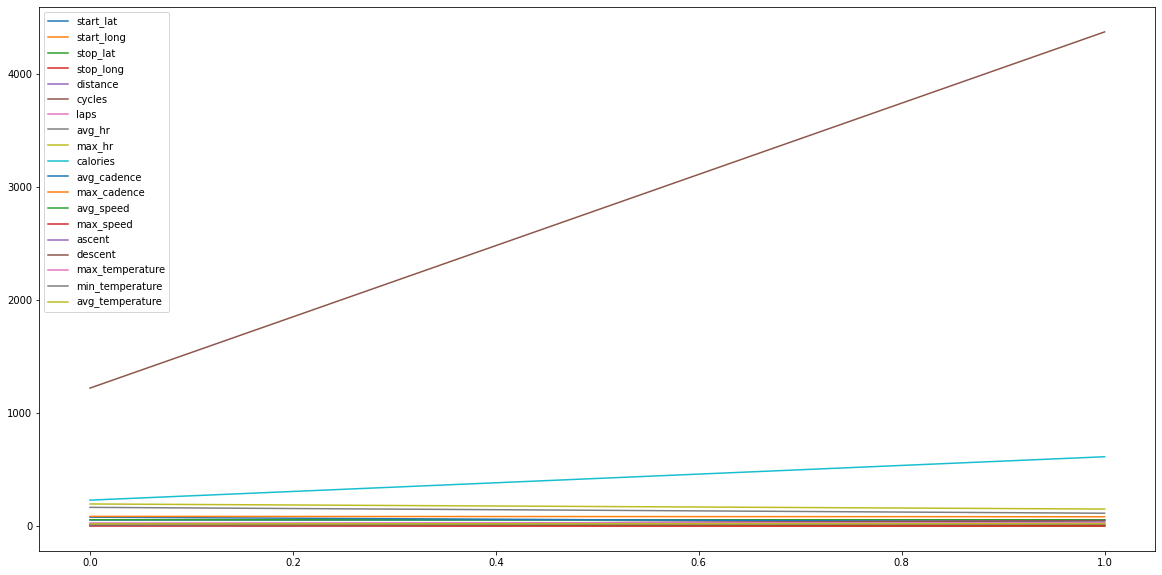

In [35]:
df.plot(figsize=(20,10))

In [4]:
summary_connection = sqlite3.connect('/Users/dominicdowding/HealthData/DBs/summary.db')

In [26]:
summary_df = pd.read_sql_query("SELECT * FROM days_summary", summary_connection)

In [27]:
summary_df

,hr_avg,hr_min,hr_max,rhr_avg,rhr_min,rhr_max,inactive_hr_avg,inactive_hr_min,inactive_hr_max,weight_avg,...,sweat_loss_avg,sweat_loss,spo2_avg,spo2_min,rr_waking_avg,rr_max,rr_min,bb_max,bb_min,day
0,71.273256,46.0,109.0,47.0,47.0,47.0,64.454545,47.0,85.0,72.000000,...,None,None,NaN,NaN,None,None,None,73,38,2022-01-08
1,71.652011,45.0,191.0,48.0,48.0,48.0,60.903226,46.0,99.0,75.976722,...,None,None,NaN,NaN,None,None,None,100,22,2022-01-09
2,67.007519,48.0,109.0,51.0,51.0,51.0,61.430233,48.0,106.0,74.162353,...,None,None,94.0,90.0,None,None,None,94,24,2022-01-10
3,66.814085,46.0,112.0,51.0,51.0,51.0,58.437500,47.0,81.0,74.298430,...,None,None,95.0,87.0,None,None,None,100,33,2022-01-11
4,71.775270,47.0,138.0,51.0,51.0,51.0,65.283333,47.0,125.0,74.570586,...,None,None,94.0,85.0,None,None,None,95,54,2022-01-12
5,64.293651,45.0,110.0,49.0,49.0,49.0,59.376471,46.0,81.0,NaN,...,None,None,95.0,88.0,None,None,None,64,33,2022-01-13
6,71.958414,45.0,137.0,52.0,52.0,52.0,60.780488,46.0,112.0,NaN,...,None,None,94.0,86.0,None,None,None,100,25,2022-01-14
7,52.988024,45.0,96.0,50.0,50.0,50.0,53.054054,46.0,63.0,NaN,...,None,None,94.0,85.0,None,None,None,100,28,2022-01-15


In [39]:
heart_summary_df = summary_df[['hr_avg', 'hr_min', 'hr_max', 'rhr_avg', 'rhr_min', 'rhr_max', 'inactive_hr_avg', 'inactive_hr_min', 'inactive_hr_max']]

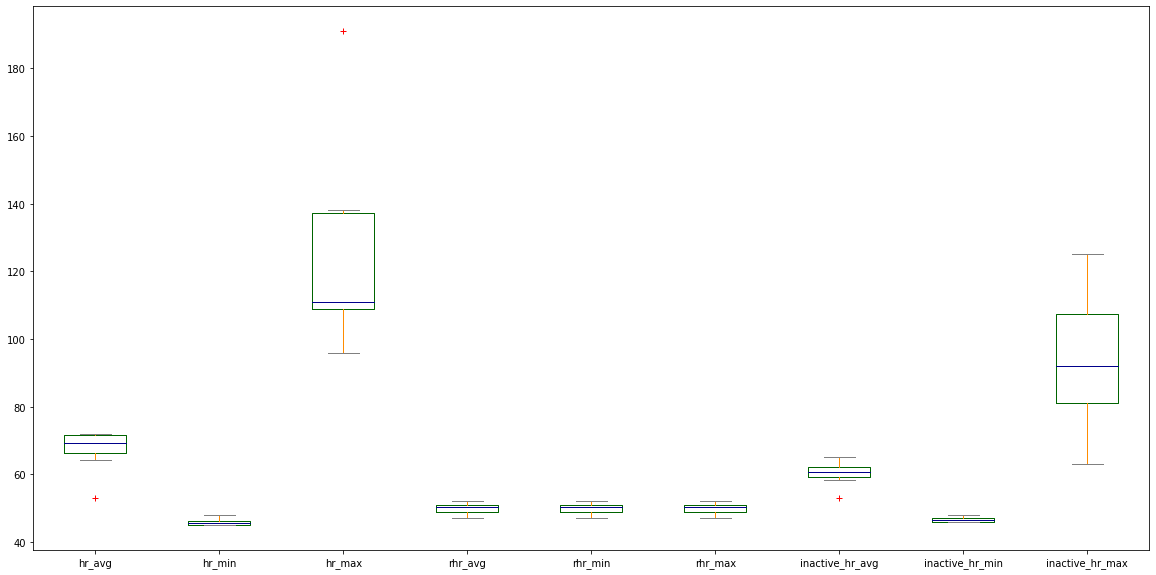

In [40]:
color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
}

heart_summary_df.plot.box(color=color, sym="r+", figsize=(20,10));

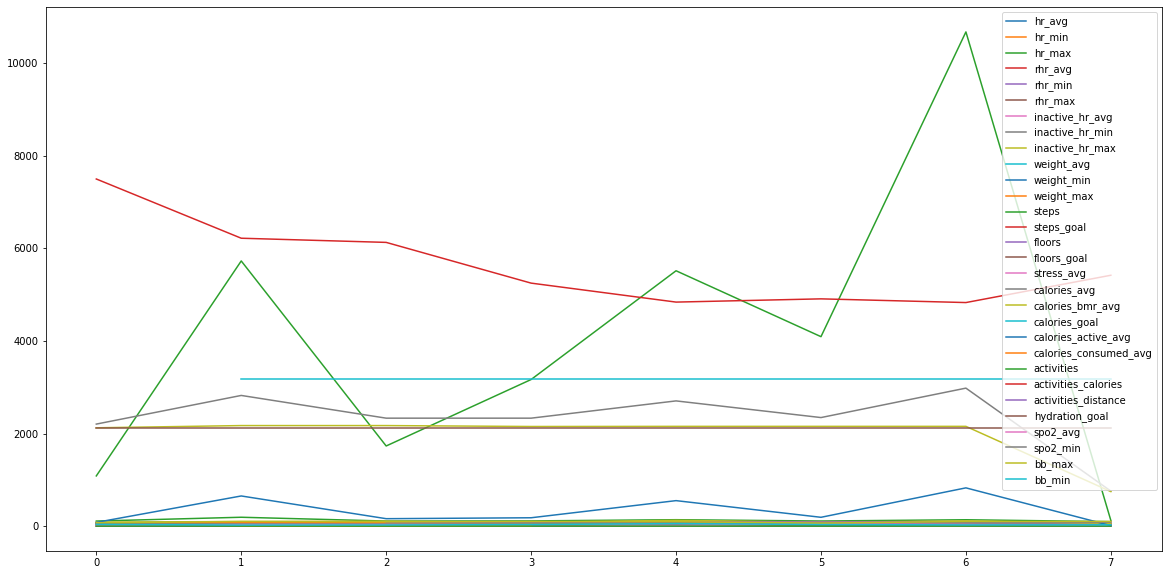

In [37]:
summary_df.plot(figsize=(20,10));

In [10]:
sleep_connection = sqlite3.connect('/Users/dominicdowding/HealthData/DBs/garmin.db')
sleep_df = pd.read_sql_query("SELECT * FROM sleep_events", sleep_connection)

In [13]:
sleep_df

,timestamp,event,duration
0,2022-01-10 22:04:00.000000,light_sleep,00:21:00.000000
1,2022-01-10 22:25:00.000000,awake,00:01:00.000000
2,2022-01-10 22:26:00.000000,light_sleep,00:01:00.000000
3,2022-01-10 22:27:00.000000,awake,00:01:00.000000
4,2022-01-10 22:28:00.000000,light_sleep,00:02:00.000000
...,...,...,...
157,2022-01-12 04:00:00.000000,rem_sleep,00:13:00.000000
158,2022-01-12 04:13:00.000000,light_sleep,00:11:00.000000
159,2022-01-12 04:24:00.000000,rem_sleep,00:19:00.000000
160,2022-01-12 04:43:00.000000,light_sleep,00:53:00.000000


In [43]:
activity_records_connection = sqlite3.connect('/Users/dominicdowding/HealthData/DBs/garmin_activities.db')
activity_records_df = pd.read_sql_query("SELECT * FROM activity_records", activity_records_connection)

In [44]:
activity_records_df

,activity_id,record,timestamp,position_lat,position_long,distance,cadence,hr,rr,altitude,speed,temperature
0,8086043060,0,2022-01-09 09:51:18.000000,53.223124,-2.831159,0.00164,76,79,None,4.2,7.5240,26.0
1,8086043060,1,2022-01-09 09:51:20.000000,53.223146,-2.831121,0.00509,76,83,None,4.2,8.2296,26.0
2,8086043060,2,2022-01-09 09:51:22.000000,53.223173,-2.831083,0.00903,76,88,None,4.2,8.0280,26.0
3,8086043060,3,2022-01-09 09:51:25.000000,53.223225,-2.831024,0.01583,76,89,None,4.0,7.8264,25.0
4,8086043060,4,2022-01-09 09:51:27.000000,53.223252,-2.830983,0.01997,76,95,None,3.6,7.5924,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1718,8116653533,1504,2022-01-14 15:25:52.000000,53.222900,-2.832540,6.96593,52,115,None,24.8,5.1732,14.0
1719,8116653533,1505,2022-01-14 15:25:53.000000,53.222890,-2.832535,6.96714,52,115,None,24.8,5.1732,14.0
1720,8116653533,1506,2022-01-14 15:25:57.000000,53.222855,-2.832504,6.97162,50,116,None,24.8,5.1732,14.0
1721,8116653533,1507,2022-01-14 15:25:58.000000,53.222850,-2.832488,6.97283,50,114,None,24.8,5.1408,14.0


In [46]:
activity_records_df['activity_id']

0       8086043060
1       8086043060
2       8086043060
3       8086043060
4       8086043060
           ...    
1718    8116653533
1719    8116653533
1720    8116653533
1721    8116653533
1722    8116653533
Name: activity_id, Length: 1723, dtype: object